In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\UCI_Credit_Card.csv")
print(df.head())  # Verify that dataset is loaded correctly


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64


In [5]:
print("\nDataset Summary:\n", df.describe())


Dataset Summary:
                  ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.2

In [6]:
df.drop(columns=["ID"], inplace=True, errors='ignore')  
print("Columns after dropping ID:", df.columns)

Columns after dropping ID: Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


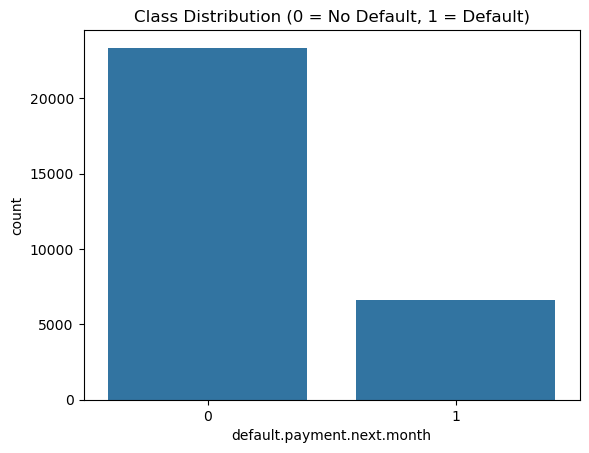

In [7]:
# Target column distribution check karein
print(df["default.payment.next.month"].value_counts())

# Bar plot visualize karein
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df["default.payment.next.month"])
plt.title("Class Distribution (0 = No Default, 1 = Default)")
plt.show()


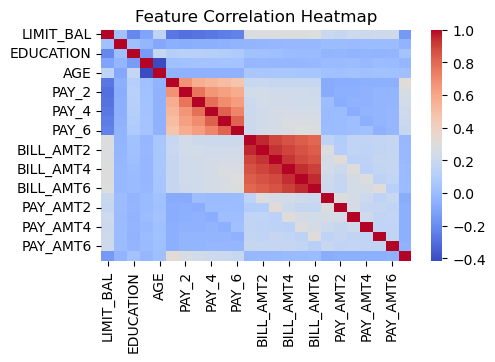

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix plot karein
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
from imblearn.over_sampling import SMOTE

# Ensure features (X) aur target (y) correctly defined hain
X = df.drop(columns=["default.payment.next.month"])
y = df["default.payment.next.month"]

# SMOTE apply karein
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
import collections
print("After SMOTE:", collections.Counter(y_resampled))


After SMOTE: Counter({1: 23364, 0: 23364})


In [25]:
models = {}  # Dictionary initialize karo
from sklearn.linear_model import LogisticRegression  # Import karo

models["Logistic Regression"] = LogisticRegression(max_iter=500)
from sklearn.linear_model import LogisticRegression

# Model initialize karo
models["Logistic Regression"] = LogisticRegression(max_iter=500)
models["Logistic Regression"] = LogisticRegression(max_iter=500)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

print("Step 1: Modules Imported Successfully!")

# Models Dictionary Initialize
models = {}

# Data Split
print("Step 2: Splitting Data...")
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Step 3: Initializing Logistic Regression Model...")
models["Logistic Regression"] = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='saga'))

# Model Train karo
print("Step 4: Training Model...")
models["Logistic Regression"].fit(X_train, y_train)

# Prediction aur Accuracy Check
print("Step 5: Making Predictions...")
y_pred = models["Logistic Regression"].predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print Accuracy
print("Step 6: Logistic Regression Accuracy:", accuracy)


Step 1: Modules Imported Successfully!
Step 2: Splitting Data...
Step 3: Initializing Logistic Regression Model...
Step 4: Training Model...
Step 5: Making Predictions...
Step 6: Logistic Regression Accuracy: 0.7143162850417291


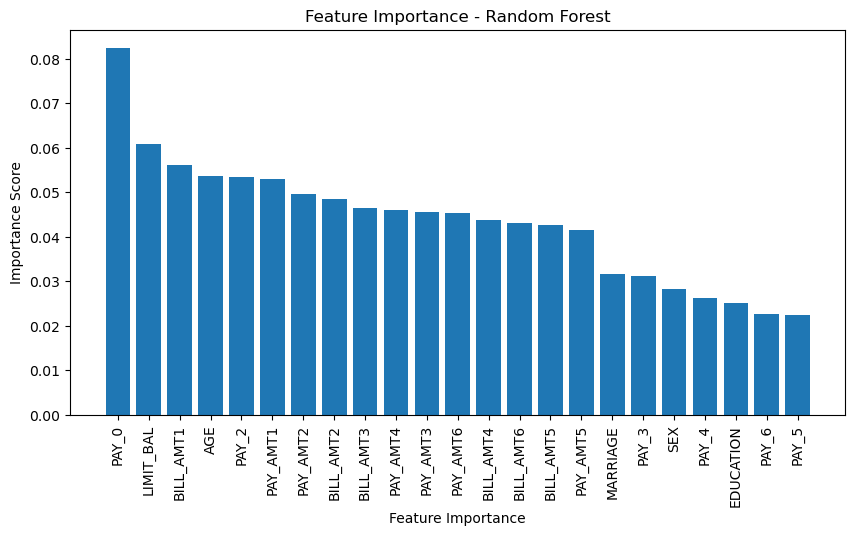

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance - Random Forest
feature_importance = models["Random Forest"].feature_importances_
feature_names = df.drop(columns=["default.payment.next.month"]).columns

# Plot
plt.figure(figsize=(10, 5))
indices = np.argsort(feature_importance)[::-1]
plt.bar(range(len(indices)), feature_importance[indices], align="center")
plt.xticks(range(len(indices)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV

# Random Forest Tuning
param_grid = {
    "n_estimators": [100],
    "max_depth": [None, 10],
    "min_samples_split": [2],
    "min_samples_leaf": [1]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("Grid Search Running...") 
grid_search.fit(X_train, y_train)  
print("Grid Search Completed!")  
print("Best Parameters for Random Forest:", grid_search.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Grid Search Running...
Grid Search Completed!
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


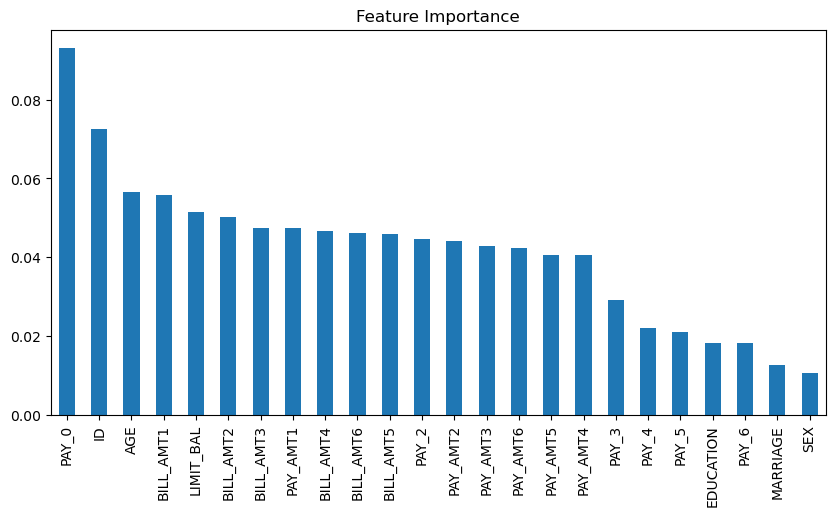

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Dataset load karo
df = pd.read_csv("C:/Users/DELL/Downloads/UCI_Credit_Card.csv")

# Features & Target define karo
X = df.drop(columns=["default.payment.next.month"])  # Target column ko hatao
y = df["default.payment.next.month"]

# Random Forest Model train karo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Feature Importance Plot
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title("Feature Importance")
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Logistic Regression with Standardization
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='saga'))
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Updated Logistic Regression Accuracy:", accuracy)


Updated Logistic Regression Accuracy: 0.7143162850417291


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8384335544618018

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.81      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Hyperparameter Tuning
rf_model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", random_search.best_params_)

# Train Best Model
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Accuracy & Report
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print("Tuned Random Forest Accuracy:", accuracy_best_rf)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
Tuned Random Forest Accuracy: 0.8353306227263


Final Model Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      4664
           1       0.86      0.81      0.83      4682

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346

AUC-ROC Score: 0.9112604529737992


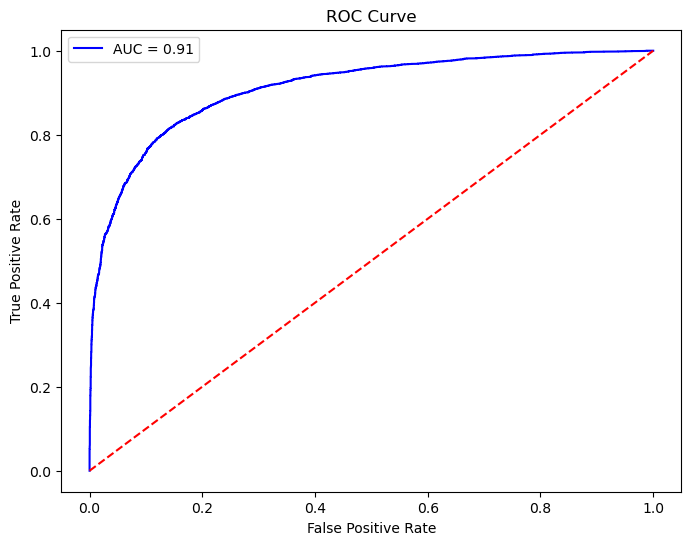

In [35]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict Probabilities for ROC Curve
y_probs = best_rf_model.predict_proba(X_test)[:, 1]  

# Print Classification Report
print("Final Model Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_probs)
print("AUC-ROC Score:", auc_score)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


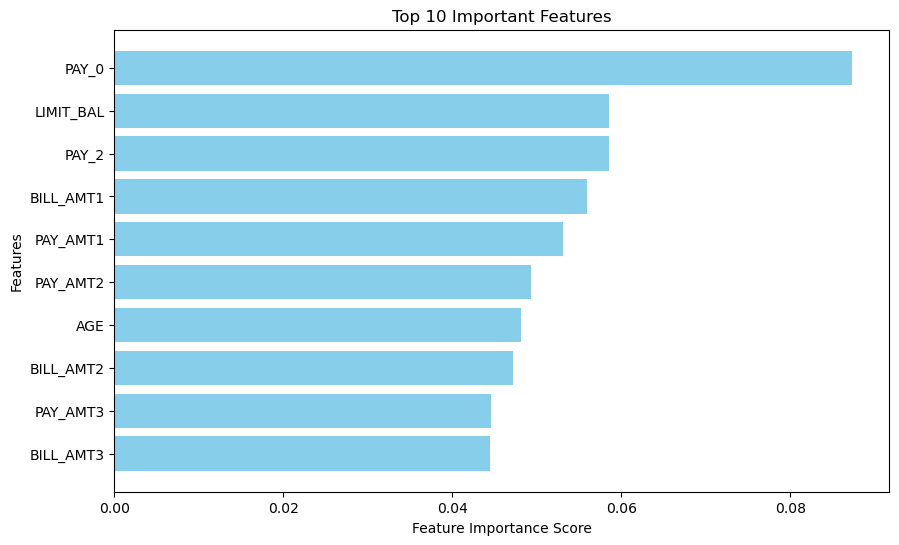

Feature Importance:
       Feature  Importance
5       PAY_0    0.087341
0   LIMIT_BAL    0.058567
6       PAY_2    0.058488
11  BILL_AMT1    0.055966
17   PAY_AMT1    0.053048
18   PAY_AMT2    0.049242
4         AGE    0.048132
12  BILL_AMT2    0.047174
19   PAY_AMT3    0.044606
13  BILL_AMT3    0.044389
22   PAY_AMT6    0.044137
20   PAY_AMT4    0.043944
14  BILL_AMT4    0.042402
15  BILL_AMT5    0.042330
16  BILL_AMT6    0.041633
21   PAY_AMT5    0.040310
3    MARRIAGE    0.034282
7       PAY_3    0.033715
1         SEX    0.029928
8       PAY_4    0.028164
2   EDUCATION    0.024975
10      PAY_6    0.024268
9       PAY_5    0.022960


In [36]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'][:10], feat_importance_df['Importance'][:10], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()

# Print feature importance values
print("Feature Importance:\n", feat_importance_df)


In [37]:
low_importance_features = feat_importance_df[feat_importance_df['Importance'] < 0.01]['Feature']
print("Low Importance Features:\n", low_importance_features)


Low Importance Features:
 Series([], Name: Feature, dtype: object)


In [38]:
# Remove low-importance features
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Train new model
best_rf_model.fit(X_train_reduced, y_train)
y_pred_reduced = best_rf_model.predict(X_test_reduced)

# Evaluate new model
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print("Accuracy after Feature Selection:", accuracy_reduced)

Accuracy after Feature Selection: 0.8353306227263


In [39]:
import joblib

# Save the trained model
joblib.dump(best_rf_model, "credit_scoring_model.pkl")

print("Model saved successfully!")


Model saved successfully!
